### Index:  
1. About Customer Churn dataset    
    1.1 Objective  
    1.2 Number of points   
    1.3 Numer of features    
    1.4 Number of classes   
    1.5 Data-points per class       
2. Univariate Analysis   
    2.1 Basic summary statistics     
    2.2 Histograms
    2.3 Probability Density Function (PDF)   
    2.4 Cumulative Distribution Function (CDF)   
    2.5 Box pLots    
    2.6 Violin plots   
3. Bi-variate analysis   
    3.1 Scatter plots   
    3.2 Pair plots   
4. Multi Variate analysis   
    4.1 Contour plots
5. Summary   

### About Customer Churn Data Set:   
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
1. **RowNumber :**Row Numbers from 1 to 10000   
2. **CustomerId :** Unique Ids for bank customer identification   
3. **Surname :** Customer's last name   
4. **CreditScore :** Credit score of the customer   
5. **Geography :** The country from which the customer belongs   
6. **Gender :** Male or Female   
7. **Age :** Age of the customer   
8. **Tenure :** Number of years for which the customer has been with the bank   
9. **Balance:** Bank balance of the customer   
10. **NumOfProducts :** Number of bank products the customer is utilising   
11. **HasCrCard :** Binary Flag for whether the customer holds a credit card with the bank or not   
12. **IsActiveMember :** Binary Flag for whether the customer is an active member with the bank or not   
13. **EstimatedSalary :** Estimated salary of the customer in Dollars   
14. **Exited :** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained   

**Objective:**    
1. The objective of this analaysis is to explore the feasibility to classify/predict the target feature "Exited" when all the other features are given. In other words a good-fitting, parsimonious model    
2. Identify missing values, outliers or any other anamolies in the dataset     
3. A ranked list of features which can explain the target variable   

In [68]:
# To supress any warnings during execution
import warnings 
warnings.filterwarnings("ignore")
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
# Load the data
dataset = pd.read_csv('Churn_Modelling.csv')
customer_data = dataset
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# data-points and features
print("Shape of the data set is:" , customer_data.shape)

Shape of the data set is: (10000, 14)


In [71]:
# Column names
print("The column names in the data set are:", customer_data.columns) 

The column names in the data set are: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [72]:
# Data points for each class attribute of the feature 'status' 
print(customer_data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


In [73]:
# Basic info about the data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
# Basic summary statistics 
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [75]:
# dropping the RowNumber,customerid,surname column
customer_data = customer_data.drop(['RowNumber','CustomerId','Surname'], axis = 1)
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The feature Age should be treated more of a categorical variable. Because an age of (say)33.46 in general dosent make much sense. Hence binning the age into groups and treating them as a categorical/discrete variable would make much more sense to the analysis 

In [76]:
# Rearranging the columns
customer_data.insert(0, 'Age_bin', customer_data['Age'])

In [77]:
customer_data['Age_bin'] = customer_data['Age']
# Binning the Age column and adding a new column customer_data['Age_binned']
f = lambda x: 'Below 10' if x > 0 and x <= 10 else (
    '10-20' if x > 10 and x <= 20 else (
        '20-40' if x > 20 and x <= 40 else (
            '40-60' if x > 40 and x <= 60 else (
                '60-80' if x > 60 and x < 80 else (
                    '80-90' if x > 80 and x <= 90 else(
                        'Above 90' if x > 90 else None))))))


customer_data['Age_bin'] = customer_data['Age_bin'].apply(f)

# converting the binary values of exited column data to "yes" and "no"
customer_data['Exited'] = customer_data['Exited'].replace(0,"No")
customer_data['Exited'] = customer_data['Exited'].replace(1,"Yes")

# Print the head after binning
customer_data.head()

,Age_bin,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,40-60,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,40-60,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,40-60,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,20-40,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,40-60,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


**Observations:**   
1. The dataset consists of 1000 observations for 12 features   
2. There are no missing values for any of the features   
3. The target feature "Exited" has 2 classes - 0, 1 with a count of 7963 and 2037 respectively. Since there is a considerable difference  in the target feature class count, it is not a balanced set   
4. Features like Row numbers, customer Ids and Surnames clearly donot have any influence over the target feature Exited. Hence dropping the features which are not significant for the analysis

### Univariate Analysis:   

### Histograms & Probability Density Curves:  
1. curve and the box height indicate density   
2. Histograms indicate the count on y axis vs bins on x axis   
3. PDF is a curve formed by smoothening the histogram tips   
4. The area under the PDF curve shows the density of a particular feature distributed in that area

In [78]:
# histograms of all the features
customer_data_exited = customer_data.loc[customer_data['Exited'] == 'Yes']
customer_data_stayed = customer_data.loc[customer_data['Exited'] == 'No']

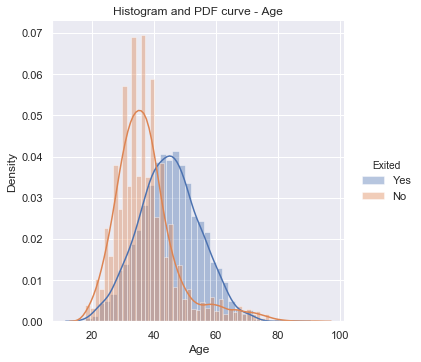

In [83]:


sns.FacetGrid(customer_data, hue="Exited", size=5, margin_titles=True) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Histogram and PDF curve - Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


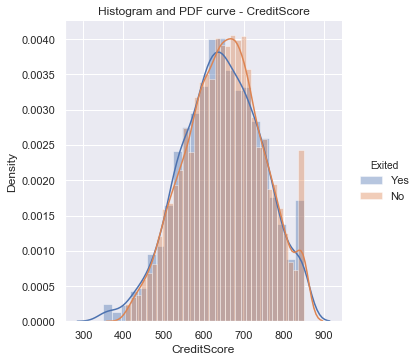

In [84]:
sns.FacetGrid(customer_data, hue="Exited", size=5, margin_titles=True) \
   .map(sns.distplot, "CreditScore") \
   .add_legend();
plt.title("Histogram and PDF curve - CreditScore")
plt.xlabel("CreditScore")
plt.ylabel("Density")
plt.show()

**Observation:**   
1. Looking at the distibution plot of the feature 'Age', it can be interepreted that generally people approximately up to 50 are staying with the bank. But after the age 50 there is more chance of leaving the bank   